In [1]:
#here im importing all the libraries I might need to accomplish my project

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import numpy as np
import xlsxwriter
%matplotlib inline

In [4]:
%pwd

'/Users/andershornor/Desktop/Final_Project/Final_Comp_Project/experiment/results2.0'

In [11]:

#here im loeading my data let and nameing it filename
filename = pd.read_stata('../Final_proj_Data/anes_specialstudy_2012_directdem_dta/anes_specialstudy_2012_directdem.dta')

In [12]:
#here tiffany helped me to print out the column headers for columns 0-9 and 9-20

print(filename.columns[0:10])
print(filename.columns[9:20])

Index(['dd_version', 'dd_caseid', 'caseid', 'weight_pre', 'weight_post',
       'main_anes', 'sample', 'dd_pid_x', 'dd_rvote2012_x',
       'dd_presvote2012_x'],
      dtype='object')
Index(['dd_presvote2012_x', 'tm_start_ddpre', 'tm_finish_ddpre',
       'duration_ddpre', 'pre_xlike2', 'pre_revist_split', 'pre_xnoadd',
       'dem_hsename', 'dem_hseparty', 'rep_hsename', 'rep_hseparty'],
      dtype='object')


In [13]:
#here im munging the data so I have only the persons case id, their party affiliation and whoe they voted for for president.
percept_vote = filename[['dd_caseid', 'dd_pid_x', 'dd_presvote2012_x']]

In [14]:
#here im remaning the columns so they are more understandable
percept_vote.columns=[['Case_ID','Party_Affiliation', 'Pres_Vote']]
percept_vote

,Case_ID,Party_Affiliation,Pres_Vote
0,20001,2. Not very strong Democrat,1. Barack Obama (Democrat)
1,20002,6. Not very strong Republican,-6
2,20003,2. Not very strong Democrat,1. Barack Obama (Democrat)
3,20004,2. Not very strong Democrat,1. Barack Obama (Democrat)
4,20005,6. Not very strong Republican,2. Mitt Romney (Republican)
5,20006,4. Independent,-2
6,20007,"5. Ind, closer to Republican",2. Mitt Romney (Republican)
7,20008,7. Strong Republican,2. Mitt Romney (Republican)
8,20009,1. Strong Democrat,1. Barack Obama (Democrat)
9,20010,4. Independent,2. Mitt Romney (Republican)


In [15]:
#here im reindexing the table to party affiliation
caseid_by_party_affil = percept_vote.set_index(['Party_Affiliation']).sort_index()
caseid_by_party_affil.head()

,Case_ID,Pres_Vote
Party_Affiliation,,
-2.0,25422,-2
1. Strong Democrat,20798,1. Barack Obama (Democrat)
1. Strong Democrat,23612,-2
1. Strong Democrat,23619,-6
1. Strong Democrat,23624,1. Barack Obama (Democrat)


In [16]:
caseid_by_party_affil.columns=[['CaseID','Vote']]

In [17]:
percept_vote.Party_Affiliation.value_counts()

1. Strong Democrat               1079
7. Strong Republican              859
2. Not very strong Democrat       785
4. Independent                    748
6. Not very strong Republican     692
3. Ind, closer to Democratic      653
5. Ind, closer to Republican      598
-2.0                                1
dtype: int64

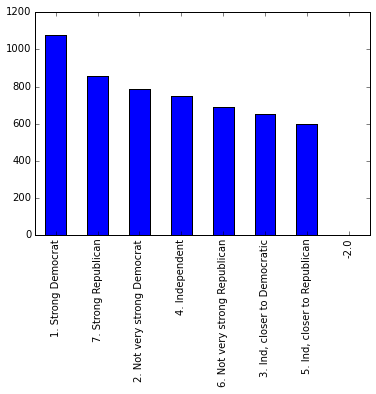

In [18]:
percept_vote.Party_Affiliation.value_counts().plot(kind='bar')
plt.show()

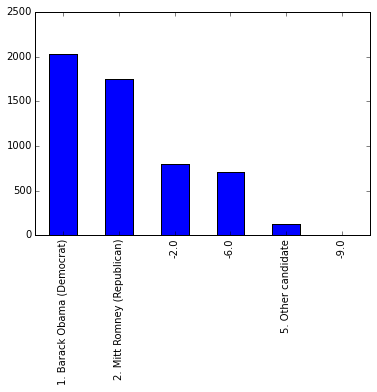

In [19]:
percept_vote.Pres_Vote.value_counts().plot(kind='bar')
plt.show()

In [20]:
pd.read_stata()

TypeError: read_stata() missing 1 required positional argument: 'filepath_or_buffer'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110f7a9b0>], dtype=object)

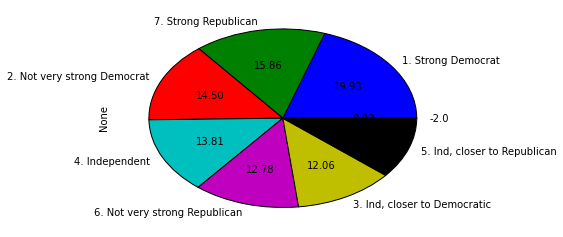

In [29]:
percept_vote.Party_Affiliation.value_counts().plot(kind= 'pie',subplots=True, autopct='%.2f')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11200f048>], dtype=object)

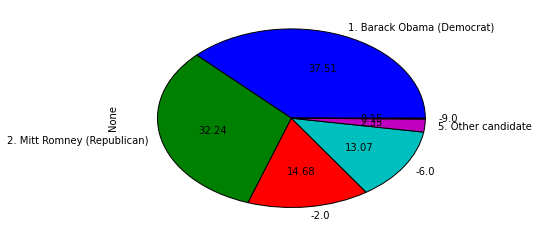

In [30]:
percept_vote.Pres_Vote.value_counts().plot(kind= 'pie',subplots=True, autopct='%.2f')

In [21]:
voters = filename[filename.dd_rvote2012_x == '1. Voted']

In [22]:
dem_voters = voters[(voters.dd_pid_x == '2. Not very strong Democrat')|(voters.dd_pid_x == '1. Strong Democrat')]

In [23]:
rep_voters = voters[(voters.dd_pid_x == '6. Not very strong Republican') | (voters.dd_pid_x == '7. Strong Republican')]

In [24]:
ind_voters = voters[(voters.dd_pid_x == '4. Independent')|(voters.dd_pid_x == '5. Ind, closer to Republican')|(voters.dd_pid_x == '3. Ind, closer to Democratic')]

In [25]:
DF=[[len(dem_voters.dd_pid_x), len(rep_voters.dd_pid_x), len(ind_voters.dd_pid_x)]]
DF.plot(kind='bar')


AttributeError: 'list' object has no attribute 'plot'

In [26]:
#This will help you group by a string in a column and will create a new dataframe with just this 
#string in the column that you specified

percept_vote.groupby(['Party_Affiliation']).get_group('Democrat')

# You could do this for all 3 groups you are trying to separate in the column, to create 3 different dataframes.
# You could work with these dataframes sepereately or you could join them together. 
 

KeyError: 'Democrat'

In [27]:
pd.read_table('u')

OSError: File b'u' does not exist